สิทธิ โง้ววัฒนา 645162020022

# **Import Library and Read Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
!ls /drive/MyDrive/2021_2/BD523_Big_Data_Exploration_and_Preparation_for_Analytics/Midterm/

1711.06970.pdf			      autos.csv
645162020022_midterm_used_cars.gdoc   cleaned_autos.csv
645162020022_midterm_used_cars.ipynb  data-society-used-cars-data.zip


In [4]:
path="/drive/MyDrive/2021_2/BD523_Big_Data_Exploration_and_Preparation_for_Analytics/Midterm/"

In [5]:
df= pd.read_csv(path+"autos.csv", encoding="Latin-1")

# **Data Preparation**
คือกระบวนการใดๆ ที่เราจำเป็นต้องทำกับข้อมูลดิบ (raw data) ที่ได้รับมา เพื่อปรับเปลี่ยนข้อมูลให้อยู่ในรูปแบบที่เหมาะสม ที่จะนำไปโหลดเข้าฐานข้อมูล หรือนำไปวิเคราะห์ต่อไป ความหมายที่เจาะจงของการทำ data preparation อาจจะแตกต่างกันไปสำหรับแต่ละระบบ ผลลัพธ์การประมวลผลของระบบหนึ่ง อาจกลายมาเป็นข้อมูลดิบของระบบต่อไป เราอาจพิจารณาการทำเตรียมข้อมูลเป็นระบบอย่างหนึ่ง ที่มี input เป็นข้อมูลดิบ และมี output เป็นข้อมูลที่อยู่ในรูปแบบที่พร้อมนำไปใช้งานต่อไปได้ทันที

In [6]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [7]:
df.shape

(371528, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [9]:
df.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


เช็ค data type เพื่อที่จะดูประเภทของ data ในแต่ละ column พบว่า column ที่เกี่ยวกับ date ยังเป็น object

In [10]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

แก้ไข data type ของ dateCrawled, lastseen และ dateCreate ให้เป็น datetime ด้วยคำสั่ง to_datetime พบจะว่า data type ได้เปลี่ยนเป็น datetime64[ns]

In [11]:
# Change the data type
df.dateCrawled = pd.to_datetime(df.dateCrawled)
df.lastSeen = pd.to_datetime(df.lastSeen)
df.dateCreated = pd.to_datetime(df.dateCreated)

In [12]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

# **Data Cleaning**
คือขั้นตอนการตรวจสอบ การแก้ไข หรือการลบ เพื่อให้รายการข้อมูลที่ไม่ถูกต้องออกไปจากชุดข้อมูล ตารางหรือฐานข้อมูล ซึ่งเป็นหลักสำคัญของฐานข้อมูล เพราะหมายถึงความไม่สมบูรณ์ ความไม่ถูกต้อง ความไม่สัมพันธ์กับข้อมูลอื่นๆ เป็นต้น

ตรวจหาค่าว่าง (Null) พบว่ามีจำนวน 5 columns มีค่าว่าง

In [13]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

ตัวอย่างการตรวจหา Null ด้วย Heatmap

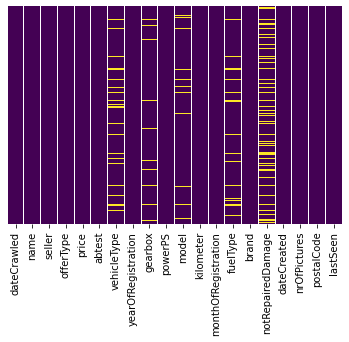

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


จากที่ใช้คำสั่ง describe จะพบว่า column nrOfPictures ไม่มี null และมีแต่ค่า 0 จึงทำการ plot มาดู และตัดสินใจได้ว่าจะตัดออกในลำดับถัดไป

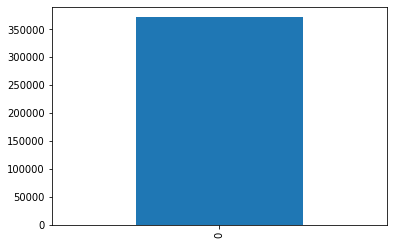

In [16]:
df.nrOfPictures.value_counts().plot(kind='bar')

จากการที่ดูไฟล์ data set ประกอบด้วย พบว่า column seller จะมี unique ทั้งหมด 2 ค่า ได้แก่ privat และ gewerblich ซึ่งค่าหลังมีจำนวนน้อยมากๆ รวมถึง column offerType เช่นกัน

privat        371525
gewerblich         3
Name: seller, dtype: int64

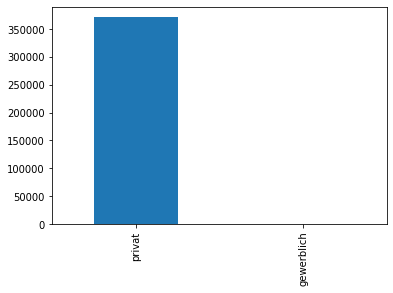

In [17]:
df.seller.value_counts().plot(kind='bar')
df.seller.value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

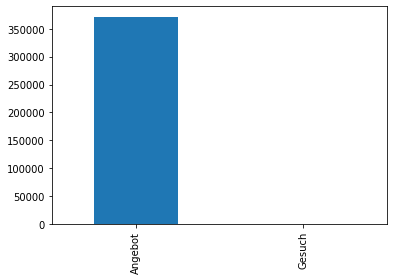

In [18]:
df.offerType.value_counts().plot(kind='bar')
df.offerType.value_counts()

จะเห็นได้ว่า 3 columns สามารถที่จะตัดออกได้ รวมทั้ง column ประเภทที่เป็นวันที่  และ name ที่เป็นชื่อประกาศขาย

In [19]:
df.drop(['name', 'seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures',
         'lastSeen', 'postalCode', 'dateCreated'],
         axis='columns', inplace=True)

In [20]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [21]:
df.shape

(371528, 11)

ทำการ drop duplicate และกำหนดช่วงของข้อมูล เพื่อกำจัด outlier ดังนี้<br>

*   **yearOfRegistration** เลือกรถยนต์ที่ผลิตในช่วงปี 1950-2017
*   **price** เลือกราคาระหว่าง 100-150000
*   **kilometer** 5000-200000<br>
*   **powerPS** 10-500<br>

In [22]:
# Removing the duplicates
df2 = df.drop_duplicates(['price','vehicleType','yearOfRegistration'
                            ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                            ,'notRepairedDamage'])

# Removing the outliers
df2 = df2[
        (df2.yearOfRegistration <= 2017) 
        & (df2.yearOfRegistration >= 1950) 
        & (df2.price >= 100) 
        & (df2.price <= 150000) 
        & (df2.powerPS >= 10) 
        & (df2.powerPS <= 500)]

และทำการเติมข้อมูลที่เป็นค่าว่างด้วย n/a

In [23]:
df2.isnull().sum()
df2['notRepairedDamage'].fillna(value='n/a', inplace=True)
df2['fuelType'].fillna(value='n/a', inplace=True)
df2['gearbox'].fillna(value='n/a', inplace=True)
df2['vehicleType'].fillna(value='n/a', inplace=True)
df2['model'].fillna(value='n/a', inplace=True)

Visualization

ลอง Plot ข้อมูลดูด้วย Bar chart เพื่อที่จะได้ทราบว่าในแต่ละ column มีข้อมูลอะไรอยู่บ้าง รวมทั้งเข้าใจการกระจายตัวของข้อมูลในแต่ละหมวดหมู่

gearbox
manuell      223955
automatik     64443
n/a            5641
Name: gearbox, dtype: int64


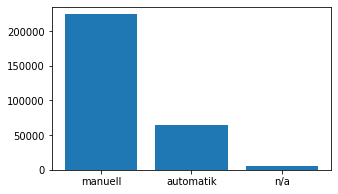

model
golf      24037
andere    21156
3er       16835
n/a       11868
polo       9991
Name: model, dtype: int64


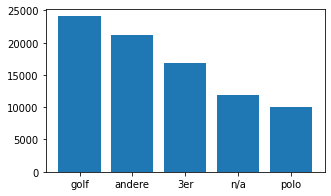

brand
volkswagen       62483
bmw              32951
opel             30750
mercedes_benz    28572
audi             27088
Name: brand, dtype: int64


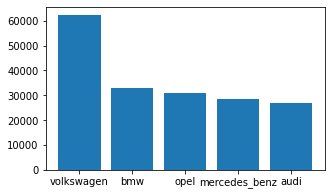

vehicleType
limousine     79937
kleinwagen    64037
kombi         56275
bus           25621
cabrio        19723
Name: vehicleType, dtype: int64


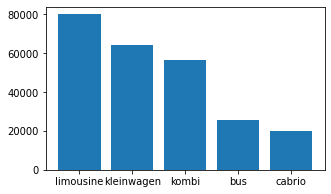

fuelType
benzin    181505
diesel     89224
n/a        17999
lpg         4453
cng          464
Name: fuelType, dtype: int64


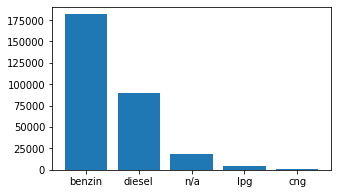

notRepairedDamage
nein    222323
n/a      43720
ja       27996
Name: notRepairedDamage, dtype: int64


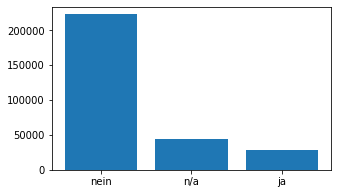

In [24]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = df2[c].unique()
    g = df2.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head())
    plt.xticks(r, g.index)
    plt.show()

ทำ Label Encoder เพื่อเปลี่ยนข้อมูลให้ใช้ได้สำหรับการแก่ปัญหาประเภท Regression โดยการแปลงข้อมูลใน Column ที่เป็นประเภท Category ได้แก่ name, gearbox, notRepairedDamage, model, brand, fuelType, vehicleType ให้เป็นตัวเลข

In [25]:
labels= ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}
 
for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(df2[l])
    tr = les[l].transform(df2[l])
    df2.loc[:, l + '_feat'] = pd.Series(tr, index=df2.index)
 
labeled = df2[ ['price' , 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration'] + [x +"_feat" for x in labels]]

**Correlation analysis**<br>
เป็นวิธีทางสถิติที่นิยมนำมาใช้วิเคราะห์เพื่อหาความสัมพันธ์ของข้อมูลมากที่สุดวิธีหนึ่ง เนื่องจากเป็นวิธีที่เข้าใจง่ายและสามารถคำนวนได้ไม่ยาก โดยค่า Correlation จะมีค่าอยู่ระหว่าง -1.0 ถึง +1.0 ซึ่งหากมีค่าใกล้ -1.0 นั้นหมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันอย่างมากในเชิงตรงกันข้าม หากมีค่าใกล้ +1.0 นั้นหมายความว่า ตัวแปรทั้งสองมีความสัมพันธ์กันอย่างมากในทิศทางเดียวกัน และหากมีค่าเป็น 0 นั้นหมายความว่า ตัวแปรทั้งสองตัวไม่มีความสัมพันธ์ต่อกัน <br><br>

ทำการ Plot Correlation เพื่อสำรวจว่าตัวแปรแต่ละตัวมีความสัมพันธ์กันมากน้อยขนาดไหน และตัวแปรใดส่งผลต่อ Price มากที่สุด จากการ Plot จะเห็นได้ว่า PowerPS, kilometer, yearOfRegistration จะส่งผลต่อ Price มากที่สุดตามลำดับ

powerPS                   0.572666
kilometer                 0.442029
yearOfRegistration        0.346602
gearbox_feat              0.296970
notRepairedDamage_feat    0.217253
brand_feat                0.104890
monthOfRegistration       0.047969
fuelType_feat             0.040559
vehicleType_feat          0.020475
model_feat                0.011466
Name: price, dtype: float64

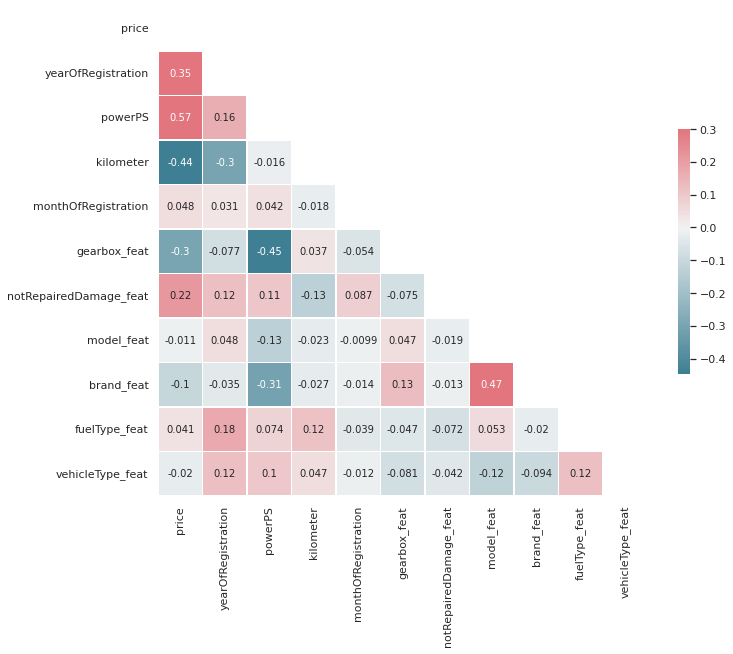

In [26]:
sns.set_theme(style="white")
corr = labeled.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={'fontsize': 10})

labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

# **Methodology**

## **Prepare Model**
ตัวแปร Target ในที่นี้คือ Price เมื่อทำการ Plot ดูการกระจายตัวจะพบว่ามีลักษณะเป็น Positive Skewness (Before) จึงทำการ scale ด้วยการใช้ log1p จาก numpy คือการใช้สมการ log(1+Y) และจึงนำค่าที่ได้ไป Plot จะเห็นได้ว่ากราฟจะเข้าใกล้ Normal Distribution มากยิ่งขึ้น (After) ทำให้สามารถทำนายได้แม่นยำยิ่งขึ้น

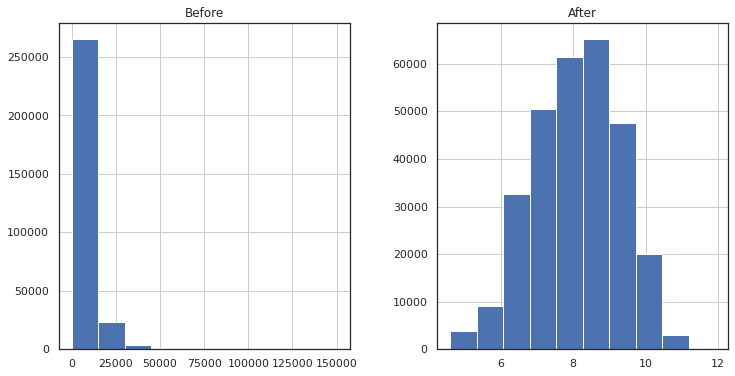

In [27]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

prices = pd.DataFrame({'Before':Y, 'After':np.log1p(Y)})
prices.hist()
Y = np.log1p(Y)

In [28]:
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer

In [29]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

test_size = 0.2

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(235231, 10) (58808, 10) (235231,) (58808,)


## **Building a Random Forest Regressor model**

ใช้ GridSearch เพื่อเซตค่า paremeter ให้เหมาะสมสำหรับโมเดล Random Forest Regressor โดยที่ตั้งค่า<br>
**criterion** คือฟังชั่นที่ใช้วัดคุณภาพในการรันแต่ละรอบ ซึ่งในกรณีนี้จะใช้ square_error<br>
**max_depth** คือจำนวนความลึกของแต่ละ tree = 10 <br>
**n_estimators** คือจำนวน tree ที่ใช้ใน Random Forest = 500 <br>
**cv** = 5<br>

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["squared_error"]
              , "max_depth": [10]
              , "n_estimators": [500] }

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1) # 5-fold cross validation
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
bp = gs.best_params_
forest = RandomForestRegressor(criterion = bp['criterion'],
                              max_depth = bp['max_depth'],
                              n_estimators = bp['n_estimators'])
forest.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.8227103746173385
{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 500}


RandomForestRegressor(max_depth=10, n_estimators=500)

ใช้คำสั่ง score เพื่อให้แสดงผลค่า Coefficient of determination (R2) ซึ่งมีค่าเท่ากับ 83.21

In [31]:
y_pred = forest.predict(X_val)
acc_rf = round(forest.score(X_train, y_train) * 100, 2)
acc_rf

83.21

## **Experimental Results**
จากการทดลองจะเห็นได้ว่าค่า R2 มีค่า 83.21 ซึ่งมีค่าที่น้อยกว่า Paper ที่เป็นต้นแบบ ในกรณีนี้อาจจะเกิดจากการที่ใช้ Feature จาก Dataset เท่านั้น ไม่ได้ทำการสร้างตัวแปรใหม่ๆเพิ่ม หรือ Feature Engineering ซึ่งทำให้เห็นได้ว่าการทำ Feature Engineering นั้นมีผลต่อความแม่นยำของโมเดล


## **Export Cleaned Dataset**

In [32]:
# labeled.to_csv('cleaned_autos.csv', index=False)